In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data_block3.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [63]:
df['Дата'] =  pd.to_datetime(df['Дата'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [71]:
grouped_df = df.groupby('Дата')['Количество'].sum()
print(grouped_df)

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
              ... 
2018-08-26    5302
2018-08-28    5983
2018-08-29    4969
2018-08-30    4648
2018-08-31    4570
Name: Количество, Length: 205, dtype: int64


Вывести несколько первых строк сгруппированных данных

In [72]:
grouped_df.head()

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

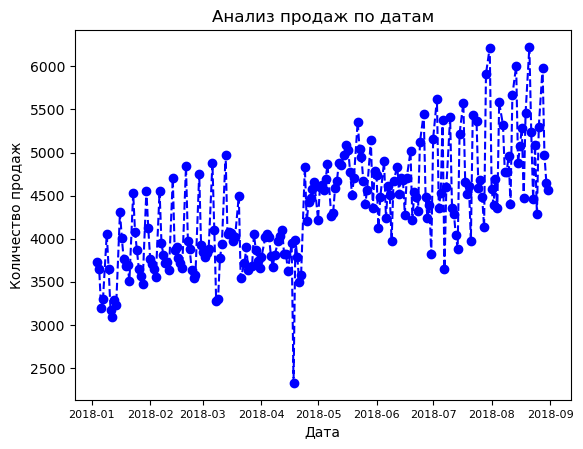

In [96]:
plt.plot( grouped_df,marker = 'o', linestyle = '--', color = 'blue', label = 'non-linear function')
plt.ylabel('Количество продаж')
plt.xlabel('Дата')
plt.title('Анализ продаж по датам')
plt.rc('xtick', labelsize = 9)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [74]:
agg_df = grouped_df.agg(['mean', 'min', 'max'])
print(agg_df)

mean    4338.863415
min     2326.000000
max     6226.000000
Name: Количество, dtype: float64


In [ ]:
Плотность графика большая, перегружен данными, нечитабельный. Общая тенденция - продажи нестабильные, скачкообразные. 
В середине апреля 2018 г.Было падение ниже 2500 (min = 2326). 
Мах продажи зафиксированы где-то в августе-сентябре 2018 г. на уровне более 6000 (max = 6226). 
С июля 2018 г. видна тенденция роста среднего дохода.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [75]:
df.groupby('Количество').max().sort_values('Количество', ascending = False).head(1)

,Дата,Склад,Контрагент,Номенклатура
Количество,,,,
200,2018-06-28,1,address_208,product_0


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [76]:
df['Месяц'] = pd.to_datetime(df['Дата'])
df['День недели'] = pd.to_datetime(df['Дата'])
df['Месяц'] = df['Месяц'].dt.month
df['День недели'] = df['День недели'].dt.weekday
df

,Дата,Склад,Контрагент,Номенклатура,Количество,Месяц,День недели
0,2018-01-04,1,address_0,product_0,4,1,3
1,2018-01-04,1,address_0,product_1,4,1,3
2,2018-01-04,1,address_0,product_2,5,1,3
3,2018-01-04,1,address_0,product_3,10,1,3
4,2018-01-04,1,address_0,product_4,2,1,3
...,...,...,...,...,...,...,...
301350,2018-08-31,5,address_173,product_15,0,8,4
301351,2018-08-31,5,address_173,product_17,1,8,4
301352,2018-08-31,5,address_173,product_18,1,8,4
301353,2018-08-31,5,address_173,product_19,0,8,4


In [77]:
filtered_df =df[(df['Склад'] == 3) & (df['Месяц'].isin([6,7,8])) & (df['День недели'] == 3)]
top_df = filtered_df.groupby('Номенклатура')['Количество'].sum().nlargest(1)
print(top_df)

Номенклатура
product_1    2781
Name: Количество, dtype: int64


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [27]:
df1 = pd.read_excel('Temperature_04.01.2018-31.08.2018.xlsx')

In [78]:
df1["Местное время в Астане"] = pd.to_datetime(df1["Местное время в Астане"], format="%d.%m.%Y %H:%M")
df1["Дата"] = df1["Местное время в Астане"].dt.date
df1.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,Дата
0,2018-08-31 23:00:00,8.2,736.6,768.3,0.2,78.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",NaN,4.6,Следы осадков,12.0,NaN,NaN,NaN,NaN,2018-08-31
1,2018-08-31 20:00:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN,2018-08-31
2,2018-08-31 17:00:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31
3,2018-08-31 14:00:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-31
4,2018-08-31 11:00:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN,2018-08-31


In [79]:
df1['Дата'] =  pd.to_datetime(df1['Дата'])

In [80]:
df1_mean = df1.groupby('Дата')['T'].mean()
print(df1_mean)

Дата
2018-01-04   -14.0750
2018-01-05   -16.8625
2018-01-06   -13.3000
2018-01-07   -12.7500
2018-01-08   -15.4125
               ...   
2018-08-27    12.5250
2018-08-28    14.1125
2018-08-29    13.8250
2018-08-30    14.1750
2018-08-31    11.0250
Name: T, Length: 240, dtype: float64


In [82]:
df_merged =pd.merge(grouped_df, df1_mean, on = 'Дата', how = 'inner')
df_merged

,Количество,T
Дата,,
2018-01-04,3734,-14.0750
2018-01-05,3643,-16.8625
2018-01-06,3193,-13.3000
2018-01-07,3298,-12.7500
2018-01-09,4055,-6.2500
...,...,...
2018-08-26,5302,11.9750
2018-08-28,5983,14.1125
2018-08-29,4969,13.8250


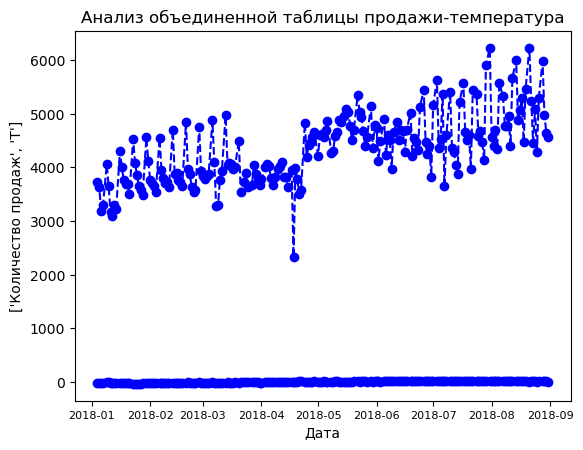

In [95]:
plt.plot( df_merged,marker = 'o', linestyle = '--', color = 'blue', label = 'non-linear function')
plt.ylabel(['Количество продаж', 'T'])
plt.xlabel('Дата')
plt.title('Анализ объединенной таблицы продажи-температура')
plt.rc('xtick', labelsize = 8)
plt.show()

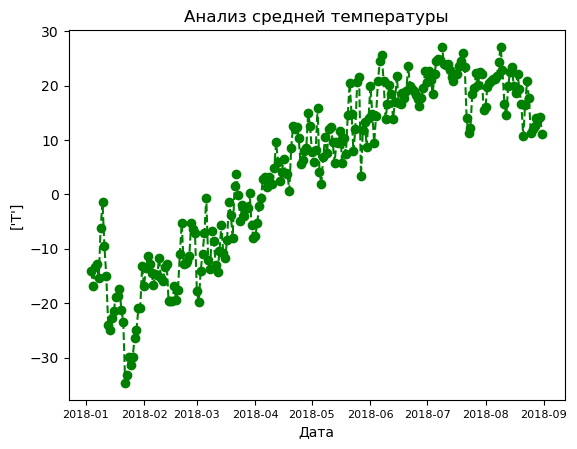

In [91]:
plt.plot( df1_mean,marker = 'o', linestyle = '--', color = 'green', label = 'non-linear function')
plt.ylabel(['T'])
plt.xlabel('Дата')
plt.title('Анализ средней температуры')
plt.rc('xtick', labelsize = 9)
plt.show()